# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento e limpeza de dados</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [261]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

In [262]:
# carregando dados
# data = pd.read_csv("./dados/houses_to_rent_mba4.csv")
data = pd.read_csv("houses_to_rent_mba4.csv")

A base de dados a ser utilizada durante todos os exercícios é `houses_to_rent_mba4.csv`.

As alterações feitas em um exercício devem ser mantidas para o próximo exercício, a não ser que expressamente indicado

---

### Exercício 1)

Inspecione o tipo dos atributos e seus valores, em particular, `city` e `country`. A seguir padronize valores dos atributos do tipo `object` que apareçam como distintos mas que deveriam ser os mesmos. Considere para a correção o valor mais frequente nesse atributo. Por exemplo: se tivermos escrito a seguinte sigla em 3 formas diferentes: `ICMC` (11 ocorrencias), `Icmc` (3 ocorrências), `I.C.M.C.` (2 ocorrências), todas devem ser convertidas para `ICMC`

Quantas linhas relativas a valores da coluna `city` e `country`, respectivamente estavam fora do padrão e foram corrigidas?

(a) 49 e 2<br>
(b) 48 e 4<br>
(c) 50 e 9<br>
(d) 48 e 54<br>


In [263]:
data.shape

(11768, 18)

In [264]:
data.dtypes

Unnamed: 0           int64
city                object
area               float64
rooms              float64
bathroom             int64
parking spaces     float64
floor               object
hoa                  int64
rent                 int64
tax                 object
insurance            int64
total              float64
page hits           object
days available       int64
interactions         int64
weeks available      int64
type                object
country             object
dtype: object

In [265]:
def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            for val in df[var].unique():
                print("\t\t", val)
            
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

Unnamed: 0 : int64, intervalo: 0 , 11767
city : object
	 7 distintos: 		 São Paulo
		 Porto Alegre
		 Rio de Janeiro
		 Campinas
		 Belo Horizonte
		 Brotas
		 Sao Paulo
area : float64, intervalo: 1.0 , 24606.0
rooms : float64, intervalo: 1.0 , 10.0
bathroom : int64, intervalo: 1 , 25
parking spaces : float64, intervalo: 1.0 , 12.0
floor : object
	 38 distintos: 		 7
		 20
		 6
		 2
		 1
		 -
		 4
		 3
		 10
		 11
		 24
		 0
		 9
		 8
		 --
		 17
		 18
		 5
		 13
		 15
		 nan
		 16
		 14
		 26
		 21
		 12
		 19
		 22
		 27
		 23
		 35
		 110
		 25
		 46
		 28
		 32
		 29
		 301
		 51
hoa : int64, intervalo: 0 , 1117000
rent : int64, intervalo: 200 , 45000
tax : object
	 1230 distintos: 		 211
		 1750
		 nr
		 22
		 25
		 834
		 85
		 1735
		 250
		 35
		 150
		 43
		 70
		 224
		 17
		 328
		 122
		 221
		 0
		 9500
		 118
		 172
		 167
		 3
		 42
		 80
		 100
		 130
		 142
		 29
		 216
		 593
		 500
		 425
		 59
		 1584
		 292
		 9
		 192
		 2000
		 10
		 256
		 147
		 700
		 56
		 77

		 110
		 220
		 592
		 560
		 146
		 2232
		 280
		 234
		 222
		 736
		 2700
		 408
		 244
		 492
		 4644
		 106
		 660
		 3420
		 378
		 4464
		 1056
		 130
		 4068
		 880
		 260
		 6156
		 992
		 142
		 236
		 2844
		 556
		 510
		 342
		 1280
		 438
		 3096
		 402
		 960
		 1104
		 1744
		 170
		 450
		 5040
		 2064
		 3492
		 3204
		 3168
		 284
		 1168
		 420
		 2628
		 4932
		 582
		 1200
		 188
		 486
		 232
		 2880
		 268
		 414
		 3456
days available : int64, intervalo: 0 , 400
interactions : int64, intervalo: 0 , 2148
weeks available : int64, intervalo: 0 , 58
type : object
	 2 distintos: 		 flat
		 house
country : object
	 3 distintos: 		 Brazil
		 Brasil
		 BR


In [266]:
print(data['city'].value_counts())
print(data['country'].value_counts())

São Paulo         7098
Rio de Janeiro    1452
Belo Horizonte    1199
Porto Alegre      1148
Campinas           816
Sao Paulo           48
Brotas               7
Name: city, dtype: int64
Brazil    11764
Brasil        2
BR            2
Name: country, dtype: int64


In [267]:
# substituir valores em city e country por valores padrão
data.loc[data['city']=='Sao Paulo','city'] = 'São Paulo'
data.loc[data['country']!='Brazil','country'] = 'Brazil'
print(data['city'].value_counts())
print(data['country'].value_counts())

São Paulo         7146
Rio de Janeiro    1452
Belo Horizonte    1199
Porto Alegre      1148
Campinas           816
Brotas               7
Name: city, dtype: int64
Brazil    11768
Name: country, dtype: int64


In [268]:
# quantidade de duplicatas
np.sum(data.duplicated())

0

<font color='red'>Foram convertidos para o padrão 48 linhas/instâncias de 'city' e 4 de 'country'<br></font>

---

### Exercício 2)

Inspecione os valores dos atributos `floor` e `tax`, realizando a conversão dos mesmos para o tipo adequado. Para evitar gerar dados faltantes desnecessariamente, verifique primeiro o padrão dos dados errôneos e faltantes, e se possível preencha corretamente alguns desses valores (conforme feito em aula para o atributo `floor`).

OBS: uma forma de inspecionar valores de uma coluna do tipo `object` que podem ser convertidos para dígitos numéricos é executar `dataframe[atributo].astype(str).str.isnumeric()`

Após esse processo, quandos valores faltantes restaram em `floor` e `tax`, respectivamente?

(a) 13 e 9<br>
(b) 78 e 9<br>
(c) 5 e 12<br>
(d) 9 e 13<br>

In [269]:
# floor e tax deveriam ser atributos numéricos, logo precisarão ser convertidos
data[['floor', 'tax']].dtypes

floor    object
tax      object
dtype: object

In [270]:
# inspecionando valores da coluna 'floor' que poderão ser convertidos a número
# data['floor'].astype(str).str.isnumeric()
# ~retorna os dados complementares
# data.loc[~data['floor'].astype(str).str.isnumeric(), 'floor']
# dados distintos que podem ser convertidos a número e as quantidades
print(data.loc[~data['floor'].astype(str).str.isnumeric(), 'floor'].unique())
print(data.loc[~data['floor'].astype(str).str.isnumeric(), 'floor'].value_counts())

['-' '--' nan]
-     2645
--       3
Name: floor, dtype: int64


In [271]:
# verificando se faz sentido substituir todos os erros por 0 (casa térrea)
data.loc[data['type']=='house', ['floor', 'type']]

,floor,type
5,-,house
15,0,house
19,-,house
20,--,house
23,-,house
...,...,...
11763,-,house
11764,-,house
11765,0,house
11766,0,house


In [272]:
# substituiremos todos os valores não convertíveis para digitos por '0'
# note que os nulos (NaNs) não serão alterados para 0
data.loc[~data['floor'].astype(str).str.isnumeric() & data['floor'].notnull(), 'floor'] = '0'
# coerce obriga a conversão, jogando para Nan que não foi convertido
data.loc[:,'floor'] = pd.to_numeric(data.loc[:,'floor'], downcast='integer', errors='coerce')
data['floor'].unique()

array([  7.,  20.,   6.,   2.,   1.,   0.,   4.,   3.,  10.,  11.,  24.,
         9.,   8.,  17.,  18.,   5.,  13.,  15.,  nan,  16.,  14.,  26.,
        21.,  12.,  19.,  22.,  27.,  23.,  35., 110.,  25.,  46.,  28.,
        32.,  29., 301.,  51.])

In [273]:
# inspecionando valores da coluna 'floor' não que poderão ser convertidos a número e as quantidades
print(data.loc[~data['tax'].astype(str).str.isnumeric(), 'tax'].unique())
print(data.loc[~data['tax'].astype(str).str.isnumeric(), 'tax'].value_counts())

['nr' '47. 5' '750.9' '140. 5' 'nsa' '107 .12 ' '-' '---' 'nd']
-           2
47. 5       1
140. 5      1
nd          1
nr          1
750.9       1
nsa         1
107 .12     1
---         1
Name: tax, dtype: int64


In [274]:
# removendo os espaços
data['tax'] = data.loc[:,'tax'].str.replace(' ', '')
print(data.loc[~data['tax'].astype(str).str.isnumeric(), 'tax'].unique())

['nr' '47.5' '750.9' '140.5' 'nsa' '107.12' '-' '---' 'nd']


In [275]:
# convertendo para númerico, atribuindo nan para os demais
data.loc[:,'tax'] = pd.to_numeric(data.loc[:,'tax'], downcast='float', errors='coerce')
print(data['tax'].unique())

[ 211. 1750.   nan ... 1737.  858. 2110.]


In [276]:
data.isnull().sum()

Unnamed: 0            0
city                  0
area                 78
rooms                79
bathroom              0
parking spaces     2965
floor                13
hoa                   0
rent                  0
tax                   6
insurance             0
total                 0
page hits             0
days available        0
interactions          0
weeks available       0
type                  0
country               0
dtype: int64

In [277]:
data.shape

(11768, 18)

<font color='red'>Portanto, permanecem faltantes após o tratamento: floor=13 e tax=6<br></font>


---
### Exercício 3)

Vamos analisar possíveis atributos redundantes na base de dados. Inspecione as colunas imprimindo quantos valores únicos cada uma possui. Considerando o tamanho da base de dados e esses resultados, quais atributos são redundantes e podem ser removidos sem perda de informação?

(a) parking spaces, country<br>
(b) country, Unnamed:0<br>
(c) country<br>
(d) Unnamed:0<br>

In [278]:
# inspecionando atributos nao numéricos
for var in data:
    print(var, ' / únicos : ', data[var].nunique())

Unnamed: 0  / únicos :  11768
city  / únicos :  6
area  / únicos :  508
rooms  / únicos :  10
bathroom  / únicos :  12
parking spaces  / únicos :  9
floor  / únicos :  36
hoa  / únicos :  1620
rent  / únicos :  1172
tax  / únicos :  1225
insurance  / únicos :  218
total  / únicos :  6132
page hits  / únicos :  290
days available  / únicos :  157
interactions  / únicos :  217
weeks available  / únicos :  51
type  / únicos :  2
country  / únicos :  1


In [279]:
data['parking spaces'].unique()

array([ 1.,  2., nan,  7.,  4.,  6.,  3.,  5.,  8., 12.])

In [280]:
data['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
11763    11763
11764    11764
11765    11765
11766    11766
11767    11767
Name: Unnamed: 0, Length: 11768, dtype: int64

In [281]:
del data['Unnamed: 0']
del data['country']

In [282]:
data.shape

(11768, 16)

In [283]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa',
       'rent', 'tax', 'insurance', 'total', 'page hits', 'days available',
       'interactions', 'weeks available', 'type'],
      dtype='object')

<font color='red'>`country` possui um valor único e pode ser removido.
    `Unnamed: 0` é a repectição dos índices e também pode ser removido.<br></font>

---

### Exercício 4)

Vamos procurar por outliers na base de dados utilizando um método baseado na dispersão pelo *desvio padrão*. 

Codifique uma função em Python no formato abaixo, que receba por parâmetro um dataframe, uma lista de atributos/variáveis e um fator multiplicador `t` para o desvio padrão.
`def remove_outliers_std(df, attributes, t):`

Essa função deve retornar um dataframe sem os outliers segundo o método do desvio padrão, ou seja, removendo aqueles cujo valor esteja: abaixo da média menos `t` desvios padrões, ou acima da média mais `t` desvios padrões. Formalmente, são outliers valores $x$ tal que $x < \mu - t\sigma$ ou $x > \mu + t\sigma$. A funcao deve processar apenas variáveis numéricas e imprimir na tela a quantidade de outliers encontrados.

Utilize a funcao implementada para remover outliers. Antes faça uma cópia do dataframe, criando um dataframe `data_out` do qual serão removidos outliers dos seguintes atributos:
1. 'insurance' com $t=3.5$
2. considerando a base obtida no passo (1) anterior, para 'total' com $t=2$.
3. considerando a base obtida no passo (2) anterior, para 'rent' com $t=5$

Quantos outliers foram encontrados respectivamente para 'insurance', 'total' e  'rent', nessa ordem?

(a) 19, 6 e 0<br>
(b) 0, 6 e 2<br>
(c) 19, 6 e 2<br>
(d) 19, 0 e 6<br>

In [284]:
def remove_outliers_std(df, attributes, t):
    """Funcao para remover outliers com base no Desvio-Padrão
    Parametros:
        - df : dataframe
        - attributes: atributos a considerar na remoção
        - t factor: fator multiplicador para o desvio-padrão
    Retorno:
        dataframe com os outliers removidos
    """
    dfn = df.copy()
        
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            desvp = dfn[var].std()
            media = dfn[var].mean()
            # qtidade de outliers
            tot_out = np.sum((df[var] < media-(desvp*t)) | (df[var] > media+(desvp*t)))             
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= media-(desvp*t)) & (df[var] <= media+(desvp*t)),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, media, desvp, tot_out))

    return dfn
    

In [285]:
# remoção dos outliers pela função criada
data_out = remove_outliers_std(df=data, attributes=['insurance'], t=3.5)
data_out = remove_outliers_std(df=data_out, attributes=['total'], t=2)
data_out = remove_outliers_std(df=data_out, attributes=['rent'], t=5)

insurance, mu = 56.54, std = 97.48, outliers = 19
total, mu = 5585.31, std = 15774.00, outliers = 6
rent, mu = 3997.23, std = 3427.39, outliers = 2


In [286]:
data_out.shape

(11741, 16)

<font color='red'>Foram removidos `insurance` = 19 `total` = 6 e `rent` = 2 outliers<br></font>

---

### Exercício 5)

Ainda analisando outliers, considerando a base de dados original (antes da remoção no exercício anterior)

Carregue o método $k$-Means utilizando: `from sklearn.cluster import KMeans`

1. Realize análise de agrupamento utilizando os atributos 'rent' e 'days available' e $k=100$ grupos. Utilize o parâmetro `random_state=0` ao criar o modelo
2. Identifique os grupos (clusters) que possuem 5 ou menos pontos
3. Considere todos os pontos pertencentes à esses grupos como candidatos a outliers
    
OBS: ver detalhes do KMeans em [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html]

Quantos outliers foram encontrados?

(a) 1<br>
(b) 3<br>
(c) 7<br>
(d) 20<br>

In [287]:
from sklearn.cluster import KMeans

In [288]:
# X1 = np.array(data['rent'])
# X2 = np.array(data['days available'])
# X = np.vstack((X1,X2)).T
X = data[['rent','days available']]
X

,rent,days available
0,3300,23
1,4960,78
2,2800,269
3,1112,73
4,800,78
...,...,...
11763,800,127
11764,1450,85
11765,12000,42
11766,8000,66


In [289]:
k = 100
model = KMeans(n_clusters = k, random_state=0).fit(X)
outputs = model.labels_

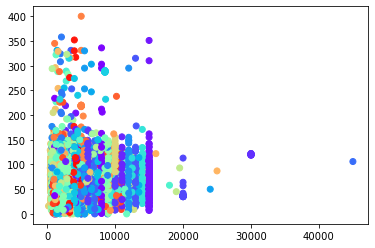

In [290]:
# KMeans fatia os dados em k=100 grupos (são as loinhas verticais)
plt.scatter(X['rent'], X['days available'], c=outputs, cmap='rainbow')

In [291]:
# saída é um vetor com as IDs dos clusters
outputs

array([97, 15, 39, ..., 19,  1, 50])

In [292]:
# Exemplo: cluster 97 tem 164 elementos
sum(outputs == 97)

164

In [293]:
# índices onde o grupo == 97
np.where(outputs == 97)

(array([    0,   292,   341,   390,   439,   488,   537,   586,   635,
          648,   661,   673,   722,   771,   820,   869,   918,   967,
         1016,  1065,  1114,  1182,  1191,  1227,  1376,  1384,  1455,
         1468,  1493,  1529,  1561,  1607,  1745,  1811,  1846,  1853,
         1913,  1924,  1957,  1997,  2013,  2137,  2151,  2201,  2405,
         2453,  2519,  2624,  2679,  2763,  3351,  3459,  3485,  3501,
         3676,  4026,  4138,  4177,  4183,  4208,  4312,  4326,  4355,
         4396,  4428,  4530,  4566,  4605,  4691,  4705,  4738,  4935,
         4961,  4977,  5022,  5031,  5150,  5331,  5339,  5384,  5409,
         5420,  5430,  5531,  5551,  5705,  5841,  5857,  5935,  5947,
         6047,  6074,  6106,  6159,  6265,  6421,  6447,  6517,  6683,
         6729,  6772,  6782,  7085,  7134,  7226,  7347,  7436,  7466,
         7522,  7638,  7815,  7837,  7872,  7929,  7942,  7979,  8051,
         8172,  8193,  8209,  8252,  8258,  8261,  8284,  8433,  8449,
      

Número de outliers estimados: 7


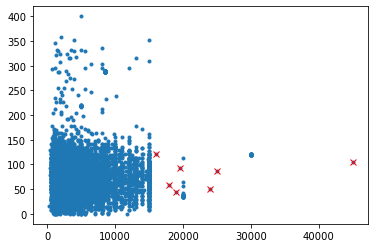

In [294]:
# somo a quantidade de elementos pertencentes a um determinado cluster de índice i
small_clusters = []
outliers = np.array([ ])
for i in range(k):
    if (np.sum(outputs == i) <= 5 ):
        small_clusters.append(i)     # adiciona o ID do cluster
        ids = np.where(outputs == i)[0]
        outliers = np.concatenate((outliers, ids)).astype(int)

n_outl_ = outliers.shape[0]

print('Número de outliers estimados: %d' % n_outl_)

plt.plot(X1, X2,'.')                       # plota todos os pontos
plt.plot(X1[outliers], X2[outliers],'xr')  # plota os outliers
plt.show()

<font color='red'>Foram encontrados 7 outliers<br></font>

---

### Exercício 6)

Considerando o preenchimento de dados faltantes, utilize a base de dados após remover outliers segundo indicado no Exercício 4 `data_out`

Codifique uma funcão que preencha valores faltantes de variáveis numéricas utilizando a média condicionada (ou agrupada) a uma outra variável categórica (não numérica)  C da base. Essa funcao deverá:
1. calcular a média da variável alvo A (a ser preenchida) relativa a cada valor distinto da variável categórica selecionada C, para linhas com valores existentes de A
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

    Exemplo: podemos preencher a média do imposto (tax) condicionado ao tipo (type) calculando a média do imposto agrupado por cada valor de tipo ('house' e 'flat'), e depois atribuir essas médias aos valores faltantes condicionado ao tipo, ou seja, a média do imposto de todas linhas contendo 'house' é atribuída a todas as propriedades 'house' com 'tax' faltante
    Similarmente, uma propriedade que é do tipo 'flat' e que possui 'tax' faltante, recebe a média de 'tax' entre todas os imóveis marcados com 'flat' para os quais há valor de 'tax'.
    
Use sua funcao para preencher a 'area' condicionado a 'type'. Armazene esse preenchimento num dataframe novo, não afetando os anteriores. Após o preenchimento, qual é a nova média para todas as linhas do atributo 'area', e arredondando para duas casas decimais?

(a) 145.36<br>
(b) 125.45<br>
(d) 131.00<br>
(d) 145.29<br>

In [295]:
def missing_condmean(df, att, att_cat):
    """Funcao para preencher faltantes de variáveis numéricas utilizando:
    a média condicionada a outra variável categórica (não numérica)
    Parametros:
        - df : dataframe
        - att: atributo numérico com faltantes a serem preenchidos
        - att_cat: atributo categórico condicional à qual os faltantes serão preenchidos
    Retorno:
        dataframe com os faltantes preenchidos
    """
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = dfn[att].isnull()                                            # encontra os faltantes no att numérico
    print(np.sum(nullatt), 'faltantes')                                    # soma dos faltantes

    for j in df[att_cat].unique():                                         # j é cada valor distinto do att categórico
        mu_cat = np.round(np.mean(df.loc[df[att_cat]==j, att]),1)          # média de att para att_cat igual a j, arred=1
        
        if (df[att].dtypes == np.int64):                                   # se dtype da att_cat for um número inteiro
            mu_cat = np.round(mu_cat,0)                                    # média de att é arredondada para 0 decimais
            
        print('\t %s tax media = %.1f' % (j, mu_cat))                      # print do valor att_cat e da média
        dfn.loc[(df[att].isnull()) & (df[att_cat]==j), att] = mu_cat       # preenche os faltantes com base no valor j
        
    return dfn

In [296]:
data_fill= missing_condmean(data_out,'area','type')

- preencher  area  condicionado a  type : 78 faltantes
	 flat tax media = 119.9
	 house tax media = 232.9


In [297]:
print('area media antes =', np.round(np.mean(data_out['area']), 2))
print('area media após =', np.round(np.mean(data_fill['area']), 2))

area media antes = 145.3
area media após = 145.36


---

### Exercício 7)

Utilizando a base de dados **antes** da remoção de outliers, elimine todas as linhas duplicadas. Quantas linhas foram removidas?

(a) 0 <br>
(b) 1270<br>
(c) 2018<br>
(d) 1260<br>


In [298]:
# quantidade de duplicatas
np.sum(data.duplicated())

1270

In [299]:
# removendo as duplicatas
data_r = data.drop_duplicates()
data_r

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7.0,2065,3300,211.0,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20.0,1200,4960,1750.0,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6.0,1000,2800,NaN,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2.0,270,1112,22.0,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1.0,0,800,25.0,11,836.0,1548,78,516,11,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,São Paulo,150.0,3.0,3,2.0,8.0,0,13500,0.0,172,13672.0,2124,114,708,16,flat
11761,Porto Alegre,63.0,2.0,1,1.0,5.0,402,1478,24.0,22,1926.0,58,86,116,12,flat
11762,São Paulo,285.0,4.0,4,4.0,17.0,3100,15000,973.0,191,19264.0,612,99,204,14,flat
11763,Brotas,100.0,1.0,2,1.0,0.0,0,800,116.0,39,955.0,148,127,148,18,house


In [300]:
data.shape[0]-data_r.shape[0]

1270

<font color='red'>Foram removidas 1270 duplicatas<br></font>

---

### Exercício 8)

Utilizando a base de dados **após** da remoção de outliers (`data_out`), elimine todas as linhas duplicadas.

(a) 1272<br>
(b) 1<br>
(c) 0<br>
(d) 1262<br>

In [301]:
# quantidade de duplicatas
np.sum(data_out.duplicated())

1262

In [302]:
# removendo as duplicatas
data_outr = data_out.drop_duplicates()
data_out.shape[0]-data_outr.shape[0]

1262

<font color='red'>Foram removidas 1262 duplicatas<br></font>

---

### Exercício 9)

Considere o atributo 'type' e analise a distribuicao dos seus valores.

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "type" como variável alvo (de saída) para um modelo de aprendizado?

(a) não é possível utilizar essa variável como saída<br>
(b) considerar o uso de técnicas de subamostragem aleatória para 'house'<br>
(c) considerar o uso de técnicas de sobreamostragem para 'house'<br>
(d) considerar o uso de técnicas de sobreamostragem para 'flat' <br>

In [303]:
data['type'].dtype

dtype('O')

In [304]:
data['type'].value_counts()

flat     9104
house    2664
Name: type, dtype: int64

In [306]:
np.sum(data['type'].isna())

0

porcentagem frente ao total: 22.5364%


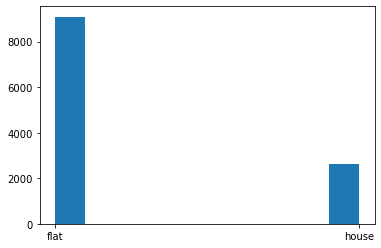

In [308]:
plt.hist(data_fill['type'])

tot_house = np.sum(data_fill['type']=='house')

print("porcentagem frente ao total: %.4f%%" % ((tot_house/data_fill.shape[0])*100))

<font color='red'>A variável está desbalanceada. Deve-se balanceá-la através de 3 alternativas: subamostrar `flat`, sobreamostrar `house` ou uma combinação de ambas. Portanto, alternativa (c)<br></font>

---

### Exercício 10)

Considere o atributo 'city' e a distribuicao dos seus valores, desconsiderando a cidade de São Paulo.
Calcule a porcentagem de exemplos da categoria com a *menor* quantidade de dados encontrada com relacao ao total.

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "city" (desconsiderando São Paulo) como variável alvo (de saída) para um modelo de aprendizado?

(a) não considerar a cidade "Brotas" na análise, e rebalancear as demais com sobreamostragem<br>
(b) utilizar a base de dados original, sem tratamento, visto ser uma proporção possível considerando o tamanho das cidades<br>
(c) utilizar o método SMOTE para a classe minoritária apenas<br>
(d) utilizar técnicas de subamostragem para as categorias majoritárias<br>

In [310]:
data_fill[data_fill['city'] != 'São Paulo']['city'].value_counts

Rio de Janeiro    1449
Belo Horizonte    1197
Porto Alegre      1147
Campinas           816
Brotas               7
Name: city, dtype: int64

In [311]:
data_fill[data_fill['city'] != 'São Paulo']['city'].value_counts(normalize=True)

Rio de Janeiro    0.313908
Belo Horizonte    0.259315
Porto Alegre      0.248484
Campinas          0.176776
Brotas            0.001516
Name: city, dtype: float64

In [312]:
data_fill[data_fill['city'] != 'São Paulo']['city'].value_counts(normalize=True).min()

0.0015164644714038128

<font color='red'>Deve-se balancear o target. Porém nesse caso 'Brotas' é muito pouco representativa, portanto o mais correto é eliminá-las e rebalancear as demais. Portanto, alternativa (a)<br></font>